# Showcasing IOPIS algorithm

In [1]:
# You can try disabling this cell to see the warnings that we are supressing
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "presentation"

from desdeo_problem import variable_builder, VectorObjective

from desdeo_emo.problem import IOPISProblem
from desdeo_emo.EAs import NSGAIII

In [3]:
variables = variable_builder(
    names = ["x_1", "x_2"],
    initial_values = [0.5,0.5],
    lower_bounds = [0, 0],
    upper_bounds = [1, 1]
)

def y(x):
    y1 = (x[:, 0] + x[:, 1]) / 2
    y2 = (x[:, 0] - x[:, 1] + 1) / 2
    return np.array((y1,y2)).T

objectives = VectorObjective(
    name=["y_1", "y_2"],
    evaluator=y
)

In [4]:
nadir = np.array([0.5,0.5])
ideal = np.array([0,0])

first_preference = {"reference point": np.array([[0.2, 0.3]])}

iopisProblem = IOPISProblem(
    objectives=[objectives], 
    variables=variables,
    nadir=nadir, # This can be approximate
    ideal=ideal,  # This can be approximate
    PIS_type="IOPIS",
    initial_preference=first_preference
)

In [5]:
# Note, the fitness values are different now!
print(iopisProblem.evaluate(np.array([[0.3,0.2]])))

Evaluation Results Object 
Objective values are: 
[[0.25 0.55]]
Constraint violation values are: 
None
Fitness values are: 
[[1.83333333 1.25      ]]
Uncertainity values are: 
[[nan nan]]



In [6]:
evolver = NSGAIII(
    iopisProblem,
    population_size=40,
    n_gen_per_iter=10,
    interact=True
)

pref, plot = evolver.start()

In [15]:
# may need to run this a few times to reach the desired area
preference = {"reference point": np.array([[0.2, 0.4]])}

pref, plot = evolver.iterate(preference)

E:\Projects\.virtualenvs\JSS31COM1\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




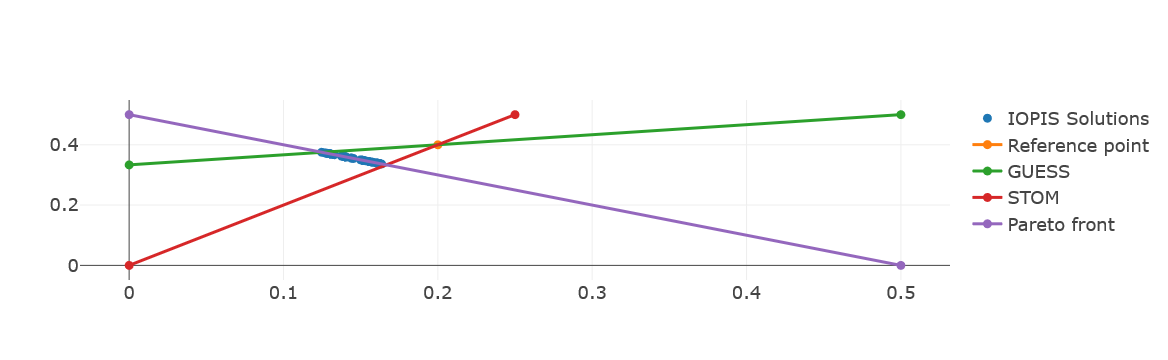

In [16]:
iopis_solutions = go.Scatter(
    x=evolver.population.objectives[:, 0],
    y=evolver.population.objectives[:, 1],
    name="IOPIS Solutions",
    mode="markers"
)

refp = go.Scatter(
    x=preference["reference point"][:,0],
    y=preference["reference point"][:,1],
    name="Reference point"
)

# Some maths magic to draw a line connecting the ideal point and the reference point
# Represents the STOM scalarization function
temp = max((nadir- preference["reference point"][0])/(ideal-preference["reference point"][0]))
end = preference["reference point"][0] + temp * (ideal - preference["reference point"][0])
stom = go.Line(
    x=[ideal[0], end[0]],
    y=[ideal[1], end[1]],
    name="STOM",
)

# Some maths magic to draw a line connecting the nadir point and the reference point
# Represents the GUESS scalarization function
temp = max((ideal- preference["reference point"][0])/(nadir-preference["reference point"][0]))
end = preference["reference point"][0] + temp * (nadir - preference["reference point"][0])
guess = go.Line(
    x=[nadir[0], end[0]],
    y=[nadir[1], end[1]],
    name="GUESS",
)

pareto = go.Line(
    x=[0, 0.5],
    y=[0.5, 0],
    name="Pareto front",
)
go.Figure([iopis_solutions, refp, guess, stom, pareto])